In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
#export
from random import random
import torch
from torch.utils.data import Dataset
import cv2
from matplotlib import pyplot as plt
from torchvision import transforms
import glob
import os

In [10]:
#export
class SimplePeopleSegmentationDS(Dataset):
    def __init__(self, dir_source, dir_gt):
        source_images_pths = glob.glob(os.path.join(dir_source, "*.jpg"))
        gt_images_pths = glob.glob(os.path.join(dir_gt, "*.png"))
        self.source_images = { int(os.path.splitext(os.path.basename(p))[0]):p for p in source_images_pths}
        self.gt_images = { int(os.path.splitext(os.path.basename(p))[0]):p for p in gt_images_pths}
        self.keys = [ int(os.path.splitext(os.path.basename(p))[0]) for p in source_images_pths]

    def __len__(self):
        return len(self.keys)

    def __getitem__(self, idx):
        img_id = self.keys[idx]
        img = cv2.imread(self.source_images[img_id])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = transforms.functional.to_pil_image(img)

        segmentation = cv2.imread(self.gt_images[img_id], cv2.IMREAD_GRAYSCALE)
        segmentation = transforms.functional.to_pil_image(segmentation)

        resize = transforms.Resize(size=(520, 520))
        img = resize(img)
        segmentation = resize(segmentation)

        i, j, h, w = transforms.RandomCrop.get_params(
            img, output_size=(512, 512))
        img = transforms.functional.crop(img, i, j, h, w)
        segmentation = transforms.functional.crop(segmentation, i, j, h, w)

        if random() > 0.5:
            img = transforms.functional.hflip(img)
            segmentation = transforms.functional.hflip(segmentation)

        img = transforms.functional.to_tensor(img).float()
        img = transforms.functional.normalize(img, mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])

        segmentation = transforms.functional.to_tensor(segmentation).float()

        sample = {'image': img, 'segmentation': segmentation}
        return sample


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


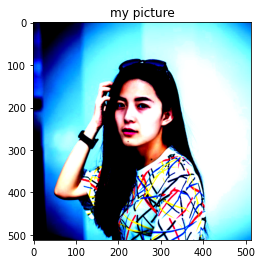

In [11]:
ds = SimplePeopleSegmentationDS("../datasets/Human-Segmentation-Dataset/Training_Images",
                                "../datasets/Human-Segmentation-Dataset/Ground_Truth")

dataset_loader = torch.utils.data.DataLoader(ds,
                                             batch_size=4, shuffle=True,
                                             num_workers=4)

img_show = ds[0]['image'].numpy().transpose((1,2,0))
plt.imshow(img_show)
plt.title('my picture')
plt.show()

In [12]:
from nbdev import *
%nbdev_default_export dataload.human_ds
from nbdev.export import *
notebook2script()

Cells will be exported to ml_package.dataload.human_ds,
unless a different module is specified after an export flag: `%nbdev_export special.module`
Converted datasets.ipynb.
Converted testing.ipynb.
